In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Clustering Colors from an Image

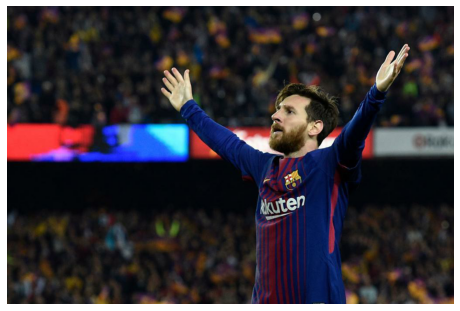

In [2]:
# load image
img = plt.imread('Messi.jpg')
plt.figure(figsize=(8,8))
plt.imshow(img) #show image
plt.axis('off');

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

img_flat = img.reshape(img.shape[0]*img.shape[1],3)
print(img_flat.shape)
img_flat[:5,:]
img_flat.shape

In [3]:
img.shape

(682, 1024, 3)

In [4]:
img_flat = img.reshape(img.shape[0] * img.shape[1], 3)

In [5]:
img_flat.shape

(698368, 3)

In [6]:
img_flat[:5,:]

array([[28, 27, 32],
       [28, 27, 32],
       [28, 27, 32],
       [28, 27, 32],
       [27, 26, 31]], dtype=uint8)

# Question1 Apply k-means Algorithm

In [7]:
kmean = KMeans(n_clusters=7, init='k-means++')

kmean.fit(img_flat)

centroids = kmean.cluster_centers_
labels = kmean.labels_

print('Centroids', centroids, sep='\n')
print('Labels', labels, sep='\n')

Centroids
[[ 11.7995231   13.45270398  17.68850451]
 [230.13092174  58.04104348  59.9682087 ]
 [ 42.27903638  34.49670828  33.46787593]
 [ 40.58528188  94.42698322 239.16604504]
 [ 97.99936854  72.8079095   62.18128349]
 [178.84585372 177.19418728 168.87369396]
 [ 11.21453849  28.09470996  82.82712514]]
Labels
[2 2 2 ... 4 4 4]


# Question 2
**loops for each cluster center**

**replace kmeans.labels_ with kmeans.cluster_centers_[i]**

In [8]:
centroids = np.uint8(centroids)

In [9]:
# OR segmented_img1 = centroids[labels]
tmp_img_flat = img_flat.copy()
for i in np.unique(labels):
    tmp_img_flat[labels == i, :] = centroids[i]

In [10]:
segmented_img = tmp_img_flat.reshape(img.shape)
segmented_img.shape

(682, 1024, 3)

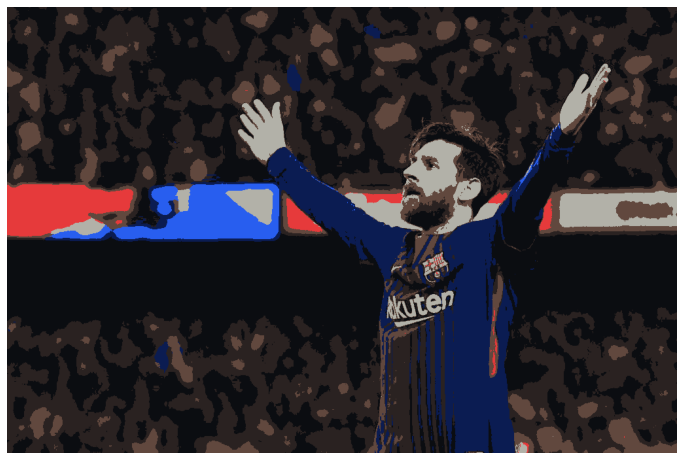

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(segmented_img)
plt.axis('off');

# Question 3 Apply elbow method

In [12]:
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Elbow = []
for k in K:
    kmean = KMeans(n_clusters=k, init='k-means++')
    kmean.fit(img_flat)
    Elbow.append(kmean.inertia_)

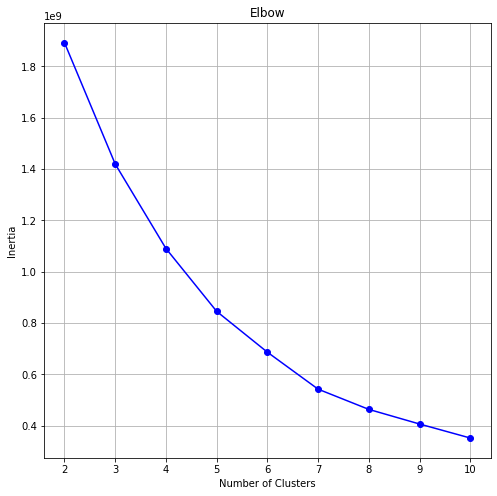

In [13]:
plt.figure(figsize=(8,8))
plt.grid(True)
plt.plot(K, Elbow, 'bo-')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('Elbow')
plt.show()